In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from colorama import Fore, Style
import plotly.graph_objects as go # Plotly graph objects

%matplotlib inline

In [51]:
data = pd.read_csv('/Users/alexg/Documents/Documents - Alex/netflixData/netflixDataCleaning.csv')
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [52]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [53]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [54]:
print(f"The data contains {data.shape[0]} rows and {data.shape[1]} columns")

The data contains 8790 rows and 10 columns


In [55]:
data.info

<bound method DataFrame.info of      show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   

In [56]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [57]:
data.isnull().any()

show_id         False
type            False
title           False
director        False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
dtype: bool

In [58]:
netflix = data.dropna()
print(f"The data contains {data.shape[0]} rows and {data.shape[1]} columns")

The data contains 8790 rows and 10 columns


In [59]:
duplicate_values = data.duplicated().sum()
print(f"The data contains {duplicate_values} duplicates values.")

The data contains 0 duplicates values.


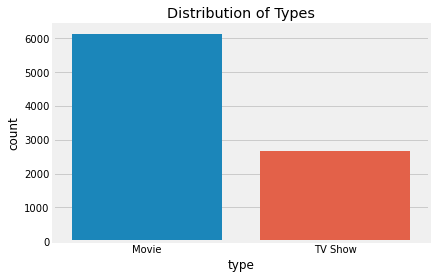

In [60]:
sns.countplot(data=netflix, x = 'type')
plt.title('Distribution of Types')
plt.show()

In [61]:
movie = netflix.loc[netflix['type'] == 'Movie'].copy()
movie['duration'] = movie['duration'].str.replace('min', '').astype(int)

In [62]:
print(movie['duration'].dtype)

int64


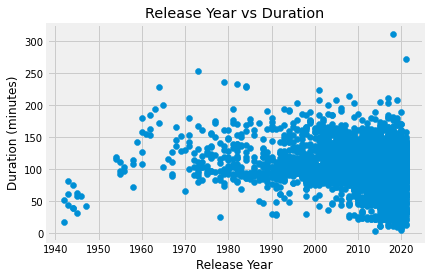

In [63]:
plt.scatter(movie['release_year'], movie['duration'])

plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.title("Release Year vs Duration")
plt.show()

In [64]:
#find index of the min movie
min_dur_index = movie['duration'].idxmin()

corresponding_min_release_year = movie.loc[min_dur_index, 'release_year']
min_duration = movie.loc[min_dur_index, 'duration']
min_title = movie.loc[min_dur_index, 'title']

print(f"The movie {Fore.GREEN}{Style.BRIGHT}{min_title}{Style.RESET_ALL} has a minimum duration of {min_duration} minutes was released in the year {corresponding_min_release_year}.")

max_dur_index = movie['duration'].idxmax()
corresponding_max_release_year = movie.loc[max_dur_index, 'release_year']
max_duration = movie.loc[max_dur_index, 'duration']
max_title = movie.loc[max_dur_index, 'title']

print(f"The movie {Fore.GREEN}{Style.BRIGHT}{max_title}{Style.RESET_ALL} has a maximum duration of {max_duration} minutes was released in the year {corresponding_max_release_year}.")

The movie Silent has a minimum duration of 3 minutes was released in the year 2014.
The movie Black Mirror: Bandersnatch has a maximum duration of 312 minutes was released in the year 2018.


In [65]:
movie_genre_counts = movie['listed_in'].value_counts()
print("Genre counts:")
movie_genre_counts

Genre counts:


Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
                                                   ... 
Cult Movies, Dramas, Thrillers                        1
International Movies, Sports Movies                   1
Documentaries, Dramas                                 1
Cult Movies, Dramas, Music & Musicals                 1
Sports Movies                                         1
Name: listed_in, Length: 278, dtype: int64

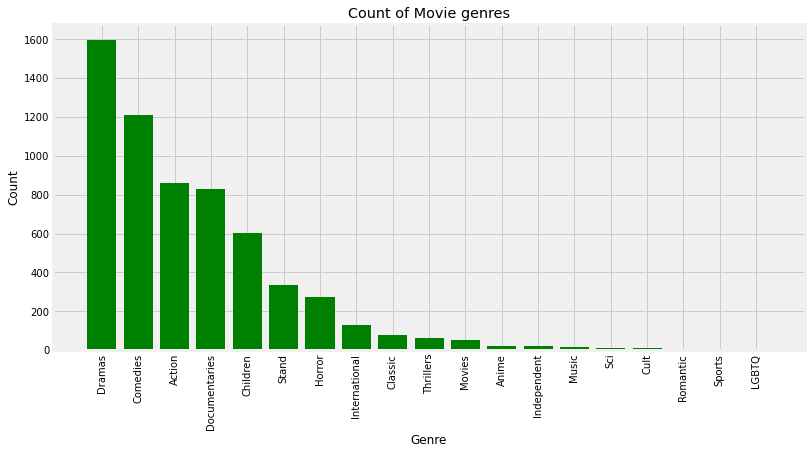

In [66]:
# Extract genres from the 'listed_in' column
movie['genres'] = movie['listed_in'].str.extract('([A-Z]\w{2,})', expand=True) 

genre_counts_movie = movie['genres'].value_counts().reset_index()
genre_counts_movie.columns = ['genre', 'count']

#bar graph
plt.figure(figsize=(12,6))
plt.bar(genre_counts_movie['genre'], genre_counts_movie['count'], color="Green")
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Count of Movie genres')
plt.show()

In [67]:
# Find the genre with the maximum count
max_genre = genre_counts_movie.loc[genre_counts_movie['count'].idxmax(), 'genre']
max_count = genre_counts_movie['count'].max()

# Find the genre with the minimum count
min_genre = genre_counts_movie.loc[genre_counts_movie['count'].idxmin(), 'genre']
min_count = genre_counts_movie['count'].min()

print(f"The genre with the maximum count is {max_genre} with {max_count} occurrences.")
print(f"The genre with the minimum count is {min_genre} with {min_count} occurrence.")


The genre with the maximum count is Dramas with 1599 occurrences.
The genre with the minimum count is Sports with 1 occurrence.


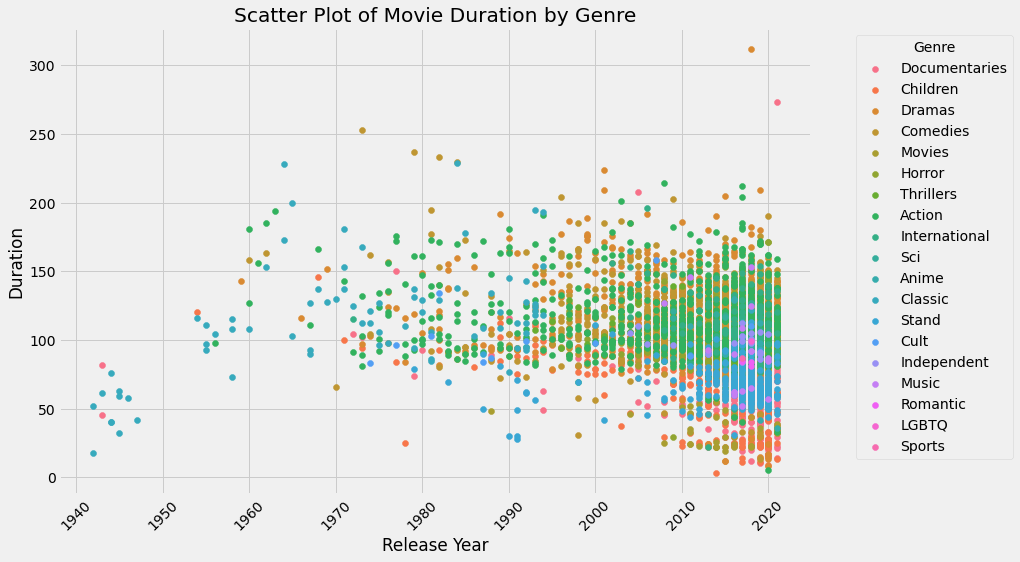

In [68]:
plt.style.use('fivethirtyeight')

palette = sns.color_palette("husl", len(movie['genres'].unique()))

plt.figure(figsize=(12,8))
for i,genre in enumerate(movie['genres'].unique()):
    plt.scatter(movie['release_year'][movie['genres'] == genre],
               movie['duration'][movie['genres'] == genre],
               label = genre,
               color=palette[i])
    
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Scatter Plot of Movie Duration by Genre')
plt.xticks(rotation=45)

plt.legend(title="Genre", bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

In [69]:
movie['rating'].value_counts()

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
UR             3
NC-17          3
Name: rating, dtype: int64

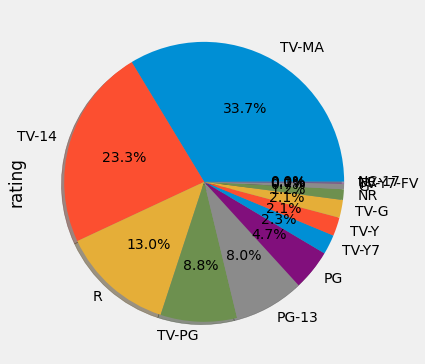

In [70]:
movie['rating'].value_counts().plot.pie(
autopct = '%1.1f%%',
shadow=True,
figsize=(14,6))
plt.show()

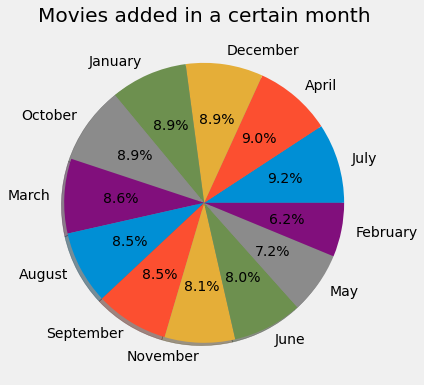

In [73]:
# Convert 'date_added' to datetime format
data['date_added'] = pd.to_datetime(data['date_added'])

movies = data.loc[data['type'] == 'Movie'].copy()
movies['month_added'] = movies['date_added'].dt.month
monthly_counts = movies['month_added'].value_counts()

max_month = monthly_counts.idxmax()
max_count = monthly_counts.max()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_counts.index = monthly_counts.index.map(month_names)

monthly_counts.plot.pie(autopct = '%1.1f%%',
shadow=True,
figsize=(14,6))
plt.title("Movies added in a certain month")
plt.ylabel(" ")
plt.show()